In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import layers, models

In [6]:
df = pd.read_csv('insurance_data.csv')

In [7]:
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [8]:
X = df[['age', 'affordibility']]
y = df.bought_insurance

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [10]:
X_train_scaled = X_train.copy()

In [11]:
X_train_scaled['age'] = X_train_scaled['age']/100
X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age']/100

In [14]:
X_test_scaled.shape

(6, 2)

In [15]:
X_train_scaled.shape

(22, 2)

In [19]:
model = models.Sequential([
    layers.Dense(1,input_shape = (2,),  activation='sigmoid'),
])
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled,y_train, epochs=1000)

Epoch 1/1000


C:\Users\abhis\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6791
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5000 - loss: 0.6789
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5000 - loss: 0.6788
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5000 - loss: 0.6786
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5000 - loss: 0.6784
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5000 - loss: 0.6782
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5000 - loss: 0.6781
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5000 - loss: 0.6779
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 0.6777
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5000 - loss: 0.6775
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5000 - loss: 0.6774
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss:

In [20]:
model.evaluate(X_test_scaled, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.8333 - loss: 0.4989


[0.4988955557346344, 0.8333333134651184]

In [21]:
y_pred = model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [26]:
y_pred = [1 if x>0.5 else 0 for x in y_pred]

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

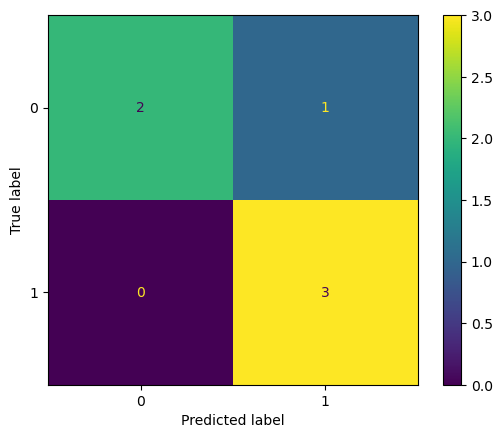

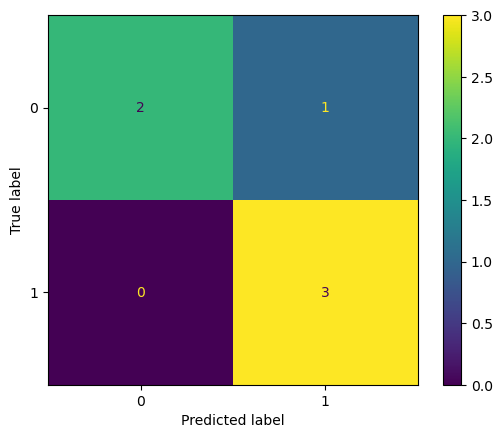

In [30]:
cm = confusion_matrix(y_test,y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

In [35]:
weights, bias = model.get_weights()

In [36]:
weights

array([[1.6265514 ],
       [0.55592316]], dtype=float32)

In [37]:
bias

array([-0.8133725], dtype=float32)

In [64]:
def sigmoid_numpy(X):
    return 1/(1+np.exp(-X))

In [65]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

# **Building Own ANN using the class**

In [66]:
class myNN:
    def __init__(self):
        self.w1 = 1 
        self.w2 = 1
        self.bias = 0
        
    def fit(self, X, y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'],y, epochs, loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")
        
    def predict(self, X_test):
        weighted_sum = self.w1*X_test['age'] + self.w2*X_test['affordibility'] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradient_descent(self, age,affordability, y_true, epochs, loss_thresold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(age)
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true, y_predicted)
            
            w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
            w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d
            
            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
            
            if loss<=loss_thresold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break

        return w1, w2, bias

In [67]:
customModel = myNN()
customModel.fit(X_train_scaled, y_train, epochs=8000, loss_thresold=0.4631)

Epoch:0, w1:0.9736899318847281, w2:0.931388810977659, bias:-0.11748951666770448, loss:0.7428288579142563
Epoch:50, w1:1.5242798722391318, w2:0.8822187836689881, bias:-1.1310088596841466, loss:0.5943161377198863
Epoch:100, w1:2.228187036337397, w2:1.0212075704807773, bias:-1.5219348336892933, loss:0.5674253359204207
Epoch:150, w1:2.878880202063386, w2:1.0918966282424583, bias:-1.8376731064036331, loss:0.5462065237139113
Epoch:200, w1:3.473286412049912, w2:1.1354958313845407, bias:-2.109494376761035, loss:0.5289749850551891
Epoch:250, w1:4.014235251285109, w2:1.168307211546194, bias:-2.3515205001257873, loss:0.5148317335261617
Epoch:300, w1:4.506491403088422, w2:1.1967920767703706, bias:-2.570834600613761, loss:0.5031414005690805
Epoch:350, w1:4.955154772161111, w2:1.2234470550440066, bias:-2.7714756232427904, loss:0.4934177492028928
Epoch:400, w1:5.3650419915514505, w2:1.2491715720776857, bias:-2.956078966702517, loss:0.48528128420193223
Epoch:450, w1:5.740481994774169, w2:1.27423488383

In [70]:
y_pred = customModel.predict(X_test_scaled)

In [71]:
y_pred = [1 if x>0.5 else 0 for x in y_pred]

In [79]:
y_pred

[1, 1, 1, 0, 0, 0]

In [77]:
y_test

9     1
25    1
8     1
21    0
0     0
12    0
Name: bought_insurance, dtype: int64